In [1]:
pip install pybamm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

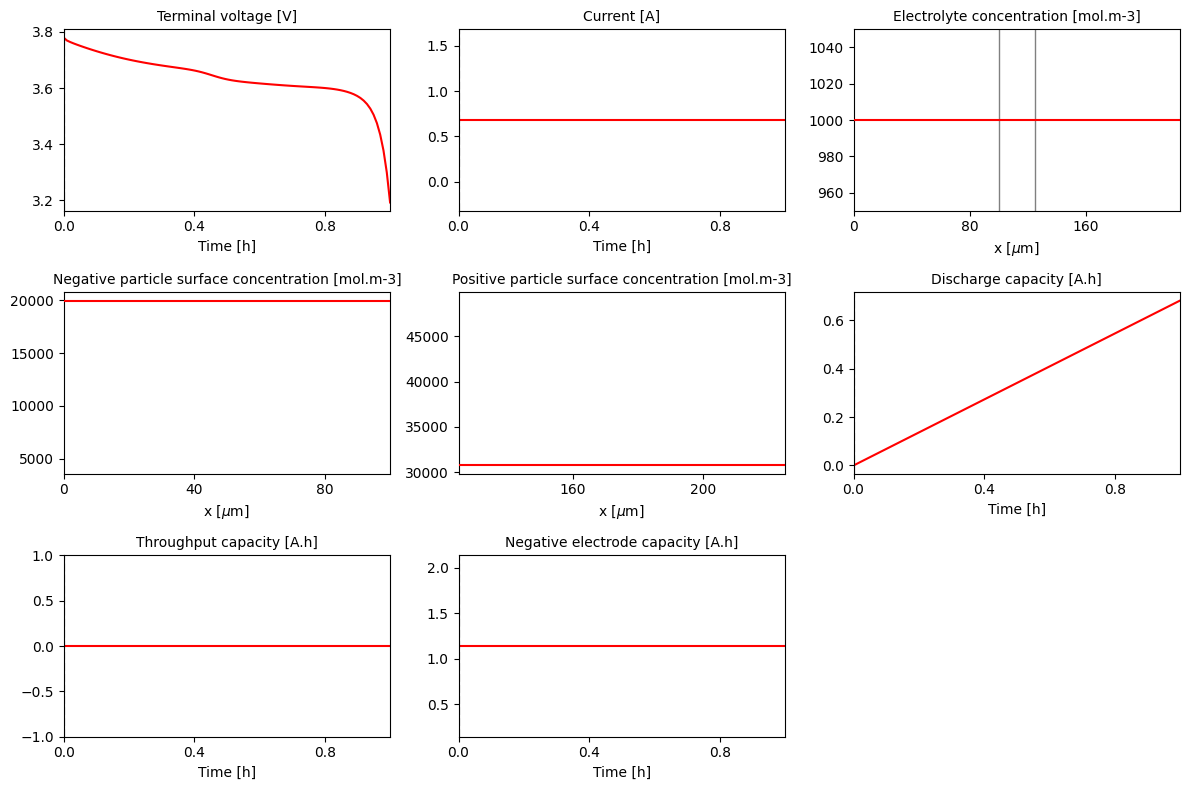

In [8]:
import pybamm
import numpy as np

# Load the Tesla 2170 cell model
model = pybamm.lithium_ion.SPM() # options={"particle": "lithium_manganese_oxide"})

# Set the initial state of charge (SOC) of the cell
#soc = pybamm.ParameterValues({"Initial SOC [pu]": 0.5})
#model.variables["State of Charge"] = soc

# Set the current profile for the simulation
t_eval = np.linspace(0, 3600, 1201)  # 1 hour simulation
current = 10 * np.sin(2 * np.pi * t_eval / 3600)  # sinusoidal current profile

# Set the initial conditions of the model
#ic = model.default_solver_init_conditions

# Set up the simulation
sim = pybamm.Simulation(model)
sim.solve([0, 3600])

# Plot the results
output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    "Electrolyte concentration [mol.m-3]",
    "Negative particle surface concentration [mol.m-3]",
    "Positive particle surface concentration [mol.m-3]"
]
sim.plot(output_variables)


In [10]:
len(model.variable_names())

465

In [11]:
model.variables.search("capacity")

Discharge capacity [A.h]
Loss of capacity to SEI [A.h]
Loss of capacity to SEI on cracks [A.h]
Loss of capacity to lithium plating [A.h]
Negative electrode capacity [A.h]
Positive electrode capacity [A.h]
Throughput capacity [A.h]
Total capacity lost to side reactions [A.h]
Total lithium capacity [A.h]
Total lithium capacity in particles [A.h]


In [6]:
pybamm.ParameterValues

pybamm.parameters.parameter_values.ParameterValues

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…

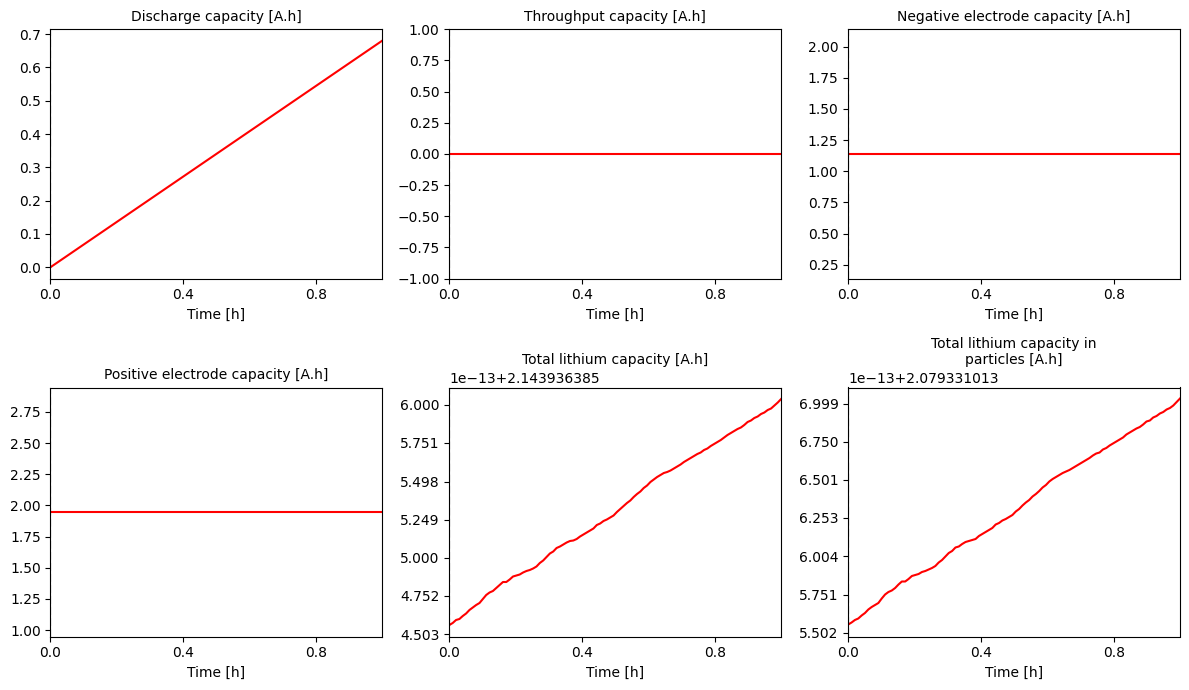

In [12]:
# Plot the results
capacity_variables = [
    "Discharge capacity [A.h]",
    "Throughput capacity [A.h]",
    "Negative electrode capacity [A.h]",
    "Positive electrode capacity [A.h]",
    "Total lithium capacity [A.h]",
    "Total lithium capacity in particles [A.h]"
]
sim.plot(capacity_variables)